# 4F13 Lecture 3: Gaussian Processes

## Joint generation of a function from a Gaussian Process

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
#define mean function
def mf(x):
    return np.zeros(x.size)

In [4]:
#define cov function
def k(x, xd):
    return np.exp(-0.5 * (x - xd)**2)

In [5]:
n = 20

In [6]:
#generate x vector, of n random samples from U[-5,5]
x = np.random.uniform(-5,5,n).reshape(n,1)

#generate vector z, of 10 random samples from std. Gaussian
z = np.random.randn(n)

#get the mean vector m
m = mf(x)

#generate K, the cov matrix from k
K = np.exp(-0.5 * ((x - x.T)**2))

In [7]:
print(K)

[[1.00000000e+00 4.00757195e-04 1.33448664e-09 2.78934211e-02
  3.92172121e-03 8.88881298e-05 9.90641562e-01 2.38408101e-02
  1.82126187e-03 5.14565256e-01 4.55849472e-08 3.27656105e-12
  8.15254384e-02 4.64434333e-01 9.90051376e-01 6.20035342e-03
  2.28539692e-08 1.00041604e-01 9.35583587e-01 9.76893874e-13]
 [4.00757195e-04 1.00000000e+00 5.12507402e-02 4.40948493e-01
  8.21930654e-01 9.35898417e-01 2.30801757e-04 4.74150918e-01
  9.21884553e-01 1.97012832e-02 1.77609519e-01 4.07957723e-03
  2.29326328e-01 2.49599198e-02 6.94141653e-04 7.45268505e-01
  1.41757620e-01 1.94528769e-01 1.58787359e-03 2.33179701e-03]
 [1.33448664e-09 5.12507402e-02 1.00000000e+00 9.98444958e-04
  9.15266706e-03 1.16487280e-01 5.50171237e-10 1.23681152e-03
  1.76765396e-02 1.08968677e-06 8.45914643e-01 6.79239764e-01
  1.79199511e-04 1.70141084e-06 3.26275972e-09 5.89132382e-03
  8.99211197e-01 1.21070647e-04 1.28699173e-08 5.79819497e-01]
 [2.78934211e-02 4.40948493e-01 9.98444958e-04 1.00000000e+00
  8.0

In [8]:
#find the Cholesky decomposition of K, R
R = np.linalg.cholesky(K)

In [9]:
#get y
y = R @ z + m

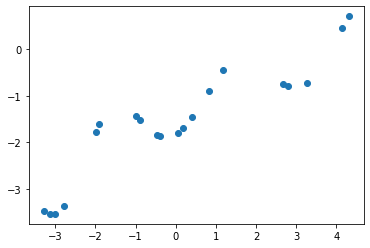

In [10]:
plt.scatter(x, y)

## Sequential generation of a function from a Gaussian Process

In [11]:
# generate new value of x to evaluate the function
new_x = np.random.uniform(-5,5,1)

# mean for new value of function
a = mf(new_x)

# make a copy of m, now called b
b = m

# variance for new value of function
A = k(new_x, new_x) # for reference, this is 1 in this case

# make a copy of K, now called C
C = K
C_inv = np.linalg.inv(C)

# vector of covariances for new value and old values of x
B = np.exp(-0.5*(x-new_x)**2).reshape(20)

In [12]:
# draw new value of function from Gaussian as defined in lectures
new_f = ((A - (B @ C_inv @ B.T)**0.5)*np.random.randn(1)) + (a + (B @ C_inv @ (y - b)))

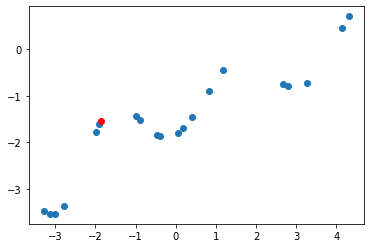

In [13]:
fig, ax = plt.subplots(1, 1)
ax.scatter(x, y)
ax.scatter(new_x, new_f, c='r')